# **MOVIE RECOMMENDER SYSTEMS**

4 Methods used for the recommendation systems :
* DEMOGRAPHIC FILETRING / POPULARITY BASED.
* CONTENT BASED RECOMMENDATIONS
* COLLABORATIVE FILTERING RECOMMENDATION SYSTEM
* HYBRID RECOMMENDATION SYSTEM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib  inline
import seaborn as sns
import scipy as sc
from ast import literal_eval

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/the-movies-dataset/ratings.csv
/kaggle/input/the-movies-dataset/links_small.csv
/kaggle/input/the-movies-dataset/credits.csv
/kaggle/input/the-movies-dataset/keywords.csv
/kaggle/input/the-movies-dataset/movies_metadata.csv
/kaggle/input/the-movies-dataset/ratings_small.csv
/kaggle/input/the-movies-dataset/links.csv


In [3]:
df = pd.read_csv('/kaggle/input/the-movies-dataset/movies_metadata.csv',low_memory=False)
df.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
df.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df['genres']

0        [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1        [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2        [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3        [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                           [{'id': 35, 'name': 'Comedy'}]
                               ...                        
45461    [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...
45462                        [{'id': 18, 'name': 'Drama'}]
45463    [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...
45464                                                   []
45465                                                   []
Name: genres, Length: 45449, dtype: object

In [8]:
df['genres']= df['genres'].fillna('[]').apply(literal_eval).apply(lambda x:[i['name'] for i in x] if isinstance(x,list) else [])

In [9]:
df['genres']

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45461                 [Drama, Family]
45462                         [Drama]
45463       [Action, Drama, Thriller]
45464                              []
45465                              []
Name: genres, Length: 45449, dtype: object

In [10]:
df['production_companies']= df['production_companies'].fillna('[]').apply(literal_eval).apply(lambda x:[i['name'] for i in x] if isinstance(x,list) else [])

In [11]:
df['production_companies']

0                                [Pixar Animation Studios]
1        [TriStar Pictures, Teitler Film, Interscope Co...
2                           [Warner Bros., Lancaster Gate]
3                 [Twentieth Century Fox Film Corporation]
4             [Sandollar Productions, Touchstone Pictures]
                               ...                        
45461                                                   []
45462                                        [Sine Olivia]
45463                            [American World Pictures]
45464                                          [Yermoliev]
45465                                                   []
Name: production_companies, Length: 45449, dtype: object

# 1. POPULARITY BASED / DEMOGRAPHIC FILTERING:

I use the TMDB Ratings to come up with our Top Movies Chart. I will use IMDB's weighted rating formula to construct my chart. Mathematically, it is represented as follows:

Weighted Rating (WR) =  (v/(v+m)).R+(m/(v+m)).C 
where,

* v is the number of votes for the movie
* m is the minimum votes required to be listed in the chart
* R is the average rating of the movie
* C is the mean vote across the whole report

The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. We will use 90th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.

Next, will build our overall Top 250 Chart and will define a function to build charts for a particular genre. 

In [12]:
vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')

vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')

C = vote_averages.mean()
C

5.24498822700966

In [13]:
m= vote_counts.quantile(0.9)
m

160.0

In [14]:
df['year'] = pd.to_datetime(df['release_date'],errors='coerce').apply(lambda x:str(x).split('-')[0] if x!=np.nan else np.nan)

In [15]:
#QUALIFIED MOVIES BASED ON m
qualified = df[(df['vote_count']>=m) & (df['vote_count'].notnull()) &
               (df['vote_average'].notnull())][['title','year','vote_count',
                                                'vote_average','popularity',
                                                'genres','production_companies']]

qualified['vote_count'] = qualified['vote_count'].astype('int')

qualified['vote_average'] = qualified['vote_average'].astype('int')

qualified.shape

(4552, 7)

Therefore, to qualify to be considered for the chart, a movie has to have at least 160 votes on TMDB. We also see that the average rating for a movie on TMDB is 5.244 on a scale of 10. 4552 Movies qualify to be on our chart.

In [16]:
def weightedrating(x):
    v=x['vote_count']
    R=x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

qualified['wr'] = qualified.apply(weightedrating,axis=1)

In [17]:
qualified = qualified.sort_values('wr',ascending=False).head(250)

#### TOP MOVIES

In [18]:
qualified

,title,year,vote_count,vote_average,popularity,genres,production_companies,wr
10309,Dilwale Dulhania Le Jayenge,1995,661,9,34.457024,"[Comedy, Drama, Romance]",[Yash Raj Films],8.268207
15480,Inception,2010,14075,8,29.108149,"[Action, Thriller, Science Fiction, Mystery, A...","[Legendary Pictures, Warner Bros., Syncopy]",7.969034
12481,The Dark Knight,2008,12269,8,123.167259,"[Drama, Action, Crime, Thriller]","[DC Comics, Legendary Pictures, Warner Bros., ...",7.964534
22879,Interstellar,2014,11187,8,32.213481,"[Adventure, Drama, Science Fiction]","[Paramount Pictures, Legendary Pictures, Warne...",7.961153
2843,Fight Club,1999,9678,8,63.869599,[Drama],"[Twentieth Century Fox Film Corporation, Regen...",7.955194
...,...,...,...,...,...,...,...,...
11007,The Devil Wears Prada,2006,3198,7,13.102384,"[Comedy, Drama, Romance]","[Twentieth Century Fox Film Corporation, Dune ...",6.916378
21604,Prisoners,2013,3183,7,11.96262,"[Drama, Thriller, Crime]","[Alcon Entertainment, Madhouse Entertainment, ...",6.916003
13187,Gran Torino,2008,3181,7,14.794228,[Drama],"[Village Roadshow Pictures, Malpaso Production...",6.915953
21276,The Conjuring,2013,3169,7,14.90169,"[Horror, Thriller]","[New Line Cinema, The Safran Company, Evergree...",6.915650


<BarContainer object of 10 artists>

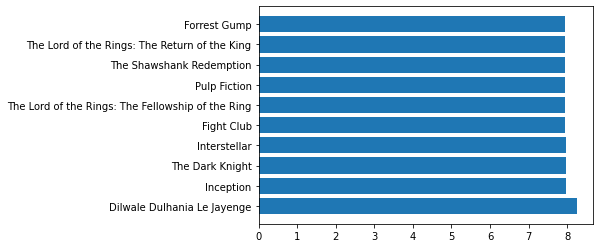

In [19]:
plt.barh('title','wr', data=qualified[:10])

We see that three Nolan Films, Inception, The Dark Knight and Interstellar occur at the near very top of our chart. The chart also indicates a strong bias of TMDB Users towards particular genres and directors.

Let us now construct our function that builds charts for particular genres. For this, we will use relax our default conditions to the 85th percentile instead of 90.

In [20]:
s= df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1,
                                                                         drop=True)

s.name= 'genre'
gen_df = df.drop('genres',axis=1).join(s)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [21]:
s

0        Animation
0           Comedy
0           Family
1        Adventure
1          Fantasy
           ...    
45461       Family
45462        Drama
45463       Action
45463        Drama
45463     Thriller
Name: genre, Length: 91066, dtype: object

In [22]:
gen_df

,adult,belongs_to_collection,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year,genre
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995,Animation
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995,Comedy
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995,Family
1,False,NaN,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995,Adventure
1,False,NaN,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995,Fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45463,False,NaN,0,NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,...,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,2003,Action
45463,False,NaN,0,NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,...,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,2003,Drama
45463,False,NaN,0,NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,...,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,2003,Thriller
45464,False,NaN,0,NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,...,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0,1917,NaN


In [23]:
def build_chart(genre,percentile=0.85):
    df1= gen_df[gen_df['genre']== genre]
    vote_counts = df1[df1['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = df1[df1['vote_average'].notnull()]['vote_average'].astype('int')
    C= vote_averages.mean()
    m= vote_counts.quantile(percentile)
    
    qualified= df1[(df1['vote_count']>=m) & (df1['vote_count'].notnull()) &
                   (df1['vote_average'].notnull())][['title','year',
                                                     'vote_count','vote_average',
                                                     'popularity']]
    
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    qualified['wr'] = qualified.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C),axis=1)
    
    qualified = qualified.sort_values('wr', ascending=False).head(250)
    
    return qualified

Trying it out for different genres, we can get :

#### TOP 10 *ROMANCE* MOVIES TO RECOMMEND :

In [24]:
build_chart('Romance').head(10)

,title,year,vote_count,vote_average,popularity,wr
10309,Dilwale Dulhania Le Jayenge,1995,661,9,34.457024,8.564969
351,Forrest Gump,1994,8147,8,48.307194,7.971335
876,Vertigo,1958,1162,8,18.20822,7.811538
40251,Your Name.,2016,1030,8,34.461252,7.789346
883,Some Like It Hot,1959,835,8,11.845107,7.744986
1132,Cinema Paradiso,1988,834,8,14.177005,7.744710
19901,Paperman,2012,734,8,7.198633,7.713766
37863,Sing Street,2016,669,8,10.672862,7.689285
882,The Apartment,1960,498,8,11.994281,7.599078
38718,The Handmaiden,2016,453,8,16.727405,7.565913


#### TOP 10 *ADVENTURE* MOVIES TO RECOMMEND :

In [25]:
build_chart('Adventure').head(10)

,title,year,vote_count,vote_average,popularity,wr
15480,Inception,2010,14075,8,29.108149,7.906435
22879,Interstellar,2014,11187,8,32.213481,7.883315
4863,The Lord of the Rings: The Fellowship of the Ring,2001,8892,8,32.070725,7.854802
7000,The Lord of the Rings: The Return of the King,2003,8226,8,29.324358,7.843721
5814,The Lord of the Rings: The Two Towers,2002,7641,8,29.423537,7.832491
256,Star Wars,1977,6778,8,42.149697,7.812629
1225,Back to the Future,1985,6239,8,25.778509,7.797643
1154,The Empire Strikes Back,1980,5998,8,19.470959,7.790139
5481,Spirited Away,2001,3968,8,41.048867,7.694795
9698,Howl's Moving Castle,2004,2049,8,16.136048,7.465046


#### TOP 10 *THRILLER* MOVIES TO RECOMMEND :

In [26]:
build_chart('Thriller').head(10)

,title,year,vote_count,vote_average,popularity,wr
15480,Inception,2010,14075,8,29.108149,7.956395
12481,The Dark Knight,2008,12269,8,123.167259,7.950091
292,Pulp Fiction,1994,8670,8,140.950236,7.929893
46,Se7en,1995,5915,8,18.45743,7.898426
24860,The Imitation Game,2014,5895,8,31.59594,7.898094
586,The Silence of the Lambs,1991,4549,8,4.307222,7.869350
11354,The Prestige,2006,4510,8,16.94556,7.868273
289,Leon: The Professional,1994,4293,8,20.477329,7.861943
4099,Memento,2000,4168,8,15.450789,7.858013
1213,The Shining,1980,3890,8,19.611589,7.848416


#### TOP 10 *COMEDY* MOVIES TO RECOMMEND :

In [27]:
build_chart('Comedy').head(10)

,title,year,vote_count,vote_average,popularity,wr
10309,Dilwale Dulhania Le Jayenge,1995,661,9,34.457024,8.463039
351,Forrest Gump,1994,8147,8,48.307194,7.963365
1225,Back to the Future,1985,6239,8,25.778509,7.952360
18465,The Intouchables,2011,5410,8,16.086919,7.945209
22841,The Grand Budapest Hotel,2014,4644,8,14.442048,7.936387
2211,Life Is Beautiful,1997,3643,8,39.39497,7.919433
732,Dr. Strangelove or: How I Learned to Stop Worr...,1964,1472,8,9.80398,7.809080
3342,Modern Times,1936,881,8,8.159556,7.695565
883,Some Like It Hot,1959,835,8,11.845107,7.680793
1236,The Great Dictator,1940,756,8,9.241748,7.651774


and so on for the rest of the genres......

# 2. CONTENT BASED RECOMMENDER SYSTEM:

The recommender we built in the previous section suffers some severe limitations. For one, it gives the same recommendation to everyone, regardless of the user's personal taste. If a person who loves romantic movies (and hates action) were to look at our Top 15 Chart, s/he wouldn't probably like most of the movies. If s/he were to go one step further and look at our charts by genre, s/he wouldn't still be getting the best recommendations.

To personalise our recommendations more, I am going to build a model that computes similarity between movies based on certain metrics and suggests movies that are most similar to a particular movie that a user liked. Since we will be using movie metadata (or content) to build this MODEL, this also known as Content Based Filtering.

I will build two Content Based Recommenders based on:

* Movie Overviews and Taglines
* Movie Cast, Crew, Keywords and Genre


In [28]:
links_small = pd.read_csv('/kaggle/input/the-movies-dataset/links_small.csv')
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')

In [29]:
df= df.drop([19730,29503,35587])

In [30]:
df['id'] = df['id'].astype('int')

In [31]:
smd = df[df['id'].isin(links_small)]
smd.shape

(9091, 25)

We have 9091 movies avaiable in our small movies metadata dataset which is 5 times smaller than our original dataset of 45000 movies.

### CONTENT BASED FILTERING - *MOVIE OVERVIEWS & TAGLINES*

In [32]:
smd['tagline'] = smd['tagline'].fillna('')
smd['description'] = smd['overview']+smd['tagline']
smd['description'] = smd['description'].fillna('')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [33]:
smd['description'][1] #JUMANJI

"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures.Roll the dice and unleash the excitement!"

In [34]:
#Vectorizer - TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

tf= TfidfVectorizer(analyzer='word',ngram_range=(1,3),
                    min_df=0,stop_words='english')
tfidf_matrix = tf.fit_transform(smd['description'])

In [35]:
tfidf_matrix.shape

(9091, 533229)

**COSINE SIMILARITY**

using the Cosine Similarity to calculate a numeric quantity that denotes the similarity between two movies.

In [36]:
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [37]:
#Using linear_kernel as the dot product of the tfidf matrices would give the cosine similarity score, also linear_kernel is much faster.

cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)

In [38]:
cosine_sim[0]

array([1.        , 0.00429673, 0.        , ..., 0.00303447, 0.        ,
       0.00232515])

We now have a pairwise cosine similarity matrix for all the movies in our dataset. The next step is to write a function that returns the 30 most similar movies based on the cosine similarity score.

In [39]:
smd= smd.reset_index()
titles = smd['title']
indices = pd.Series(smd.index,index = smd['title'])

In [40]:
#indices

In [41]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores,key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31] #0 would be the same movie itself.
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [42]:
get_recommendations('The Godfather').head(10)

973      The Godfather: Part II
8384                 The Family
3508                       Made
4195         Johnny Dangerously
29               Shanghai Triad
5666                       Fury
2411             American Movie
1581    The Godfather: Part III
4220                    8 Women
2158              Summer of Sam
Name: title, dtype: object

In [43]:
get_recommendations('Avatar').head(10)

4694    Lara Croft Tomb Raider: The Cradle of Life
2058                                    The Matrix
4505                              Tears of the Sun
2909               Pandora and the Flying Dutchman
538                          Hellraiser: Bloodline
7457                                    Green Zone
7584                                  The American
3014                                 House Party 2
2560                                     Supernova
975                                A Grand Day Out
Name: title, dtype: object

In [44]:
get_recommendations('The Dark Knight').head(10)

7928                      The Dark Knight Rises
132                              Batman Forever
1113                             Batman Returns
7562                 Batman: Under the Red Hood
8224    Batman: The Dark Knight Returns, Part 2
524                                      Batman
7898                           Batman: Year One
2578               Batman: Mask of the Phantasm
2695                                        JFK
8162    Batman: The Dark Knight Returns, Part 1
Name: title, dtype: object

We see that for The Dark Knight, our system is able to identify it as a Batman film and subsequently recommend other Batman films as its top recommendations. But unfortunately, that is all this system can do at the moment. This is not of much use to most people as it doesn't take into considerations very important features such as cast, crew, director and genre, which determine the rating and the popularity of a movie. Someone who liked The Dark Knight probably likes it more because of Nolan and would hate Batman Forever and every other substandard movie in the Batman Franchise.

**Therefore,going for a more suggestive metadata than Overview and Tagline. Now, building a more sophisticated recommender that takes genre, keywords, cast and crew into consideration.**

### CONTENT BASED FILTERING - *MOVIE METADATA*

**Here we take into considerations different movie metadata such as the movie cast, directors, keywords, genres, production company etc. to cretae a more sophiscated model expecting better recommendations.**

In [45]:
credits= pd.read_csv('/kaggle/input/the-movies-dataset/credits.csv')
keywords= pd.read_csv('/kaggle/input/the-movies-dataset/keywords.csv')

In [46]:
keywords.head(5)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [47]:
credits.head(5)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [48]:
keywords['id'] = keywords['id'].astype('int')
credits['id'] = credits['id'].astype('int')
df['id'] = df['id'].astype('int')

In [49]:
df.shape

(45446, 25)

In [50]:
df = df.merge(credits, on='id')
df = df.merge(keywords, on='id')

In [51]:
sm= df[df['id'].isin(links_small)]
sm.shape

(9187, 28)

We now have our cast, crew, genres and credits, all in one dataframe. Let us wrangle this a little more using the following intuitions:

* **Crew** : From the crew, we will only pick the director as our feature since the others don't contribute that much to the feel of the movie.
* **Cast** : Choosing Cast is a little more tricky. Lesser known actors and minor roles do not really affect people's opinion of a movie. Therefore, we must only select the major characters and their respective actors. Arbitrarily we will choose the top 4 actors that appear in the credits list.

In [52]:
sm['cast'] = sm['cast'].apply(literal_eval)
sm['crew'] = sm['crew'].apply(literal_eval)
sm['keywords'] = sm['keywords'].apply(literal_eval)
sm['cast_size'] = sm['cast'].apply(lambda x: len(x))
sm['crew_size'] = sm['crew'].apply(lambda x: len(x))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [53]:
#sm['crew'][0]

In [54]:
sm['production_companies']

0                                [Pixar Animation Studios]
1        [TriStar Pictures, Teitler Film, Interscope Co...
2                           [Warner Bros., Lancaster Gate]
3                 [Twentieth Century Fox Film Corporation]
4             [Sandollar Productions, Touchstone Pictures]
                               ...                        
40872                               [Nasser Entertainment]
41092                               [KriArj Entertainment]
41145    [UTV Motion Pictures, Ashutosh Gowariker Produ...
41311                          [Cine Bazar, Toho Pictures]
41589                 [Imagine Entertainment, Apple Corps]
Name: production_companies, Length: 9187, dtype: object

In [55]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
        return np.nan

In [56]:
sm['director'] = sm['crew'].apply(get_director)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
#sm['cast'][0]

In [58]:
sm['cast'] = sm['cast'].apply( lambda x: [i['name'] for i in x] if isinstance(x,list) else [])

sm['cast'] = sm['cast'].apply(lambda x: x[:3] if len(x) >=3 else x)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
sm['cast']

0                      [Tom Hanks, Tim Allen, Don Rickles]
1           [Robin Williams, Jonathan Hyde, Kirsten Dunst]
2               [Walter Matthau, Jack Lemmon, Ann-Margret]
3        [Whitney Houston, Angela Bassett, Loretta Devine]
4               [Steve Martin, Diane Keaton, Martin Short]
                               ...                        
40872      [Sidney Poitier, Wendy Crewson, Jay O. Sanders]
41092            [Akshay Kumar, Ileana D'Cruz, Esha Gupta]
41145            [Hrithik Roshan, Pooja Hegde, Kabir Bedi]
41311    [Hiroki Hasegawa, Yutaka Takenouchi, Satomi Is...
41589           [Paul McCartney, Ringo Starr, John Lennon]
Name: cast, Length: 9187, dtype: object

In [60]:
sm['keywords'] = sm['keywords'].apply(lambda x: [i['name'] for i in x] 
                                      if isinstance(x,list) else [])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
sm['keywords']

0        [jealousy, toy, boy, friendship, friends, riva...
1        [board game, disappearance, based on children'...
2        [fishing, best friend, duringcreditsstinger, o...
3        [based on novel, interracial relationship, sin...
4        [baby, midlife crisis, confidence, aging, daug...
                               ...                        
40872                           [friendship, brick making]
41092                                          [bollywood]
41145                                          [bollywood]
41311    [monster, godzilla, giant monster, destruction...
41589                                 [music, documentary]
Name: keywords, Length: 9187, dtype: object

What I plan on doing is creating a metadata dump for every movie which consists of genres, director, main actors and keywords. I then use a Count Vectorizer to create our count matrix as we did in the Description Recommender. The remaining steps are similar to what we did earlier: we calculate the cosine similarities and return movies that are most similar.

These are steps I follow in the preparation of my genres and credits data:

* Strip Spaces and Convert to Lowercase from all our features. This way, our model will not confuse between Johnny Depp and Johnny Galecki.
* Mention Director 3 times to give it more weight relative to the entire cast.

In [62]:
sm['cast']= sm['cast'].apply(lambda x: [str.lower(i.replace(" ","")) for i in x])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
sm['cast']

0                         [tomhanks, timallen, donrickles]
1              [robinwilliams, jonathanhyde, kirstendunst]
2                 [waltermatthau, jacklemmon, ann-margret]
3           [whitneyhouston, angelabassett, lorettadevine]
4                  [stevemartin, dianekeaton, martinshort]
                               ...                        
40872          [sidneypoitier, wendycrewson, jayo.sanders]
41092               [akshaykumar, ileanad'cruz, eshagupta]
41145               [hrithikroshan, poojahegde, kabirbedi]
41311    [hirokihasegawa, yutakatakenouchi, satomiishih...
41589              [paulmccartney, ringostarr, johnlennon]
Name: cast, Length: 9187, dtype: object

In [64]:
sm

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,video,vote_average,vote_count,year,cast,crew,keywords,cast_size,crew_size,director
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,False,7.7,5415.0,1995,"[tomhanks, timallen, donrickles]","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[jealousy, toy, boy, friendship, friends, riva...",13,106,John Lasseter
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,False,6.9,2413.0,1995,"[robinwilliams, jonathanhyde, kirstendunst]","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[board game, disappearance, based on children'...",26,16,NaN
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,False,6.5,92.0,1995,"[waltermatthau, jacklemmon, ann-margret]","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[fishing, best friend, duringcreditsstinger, o...",7,4,Howard Deutch
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,False,6.1,34.0,1995,"[whitneyhouston, angelabassett, lorettadevine]","[{'credit_id': '52fe44779251416c91011acb', 'de...","[based on novel, interracial relationship, sin...",10,10,Forest Whitaker
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,False,5.7,173.0,1995,"[stevemartin, dianekeaton, martinshort]","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[baby, midlife crisis, confidence, aging, daug...",12,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40872,False,NaN,8000000,[Drama],NaN,159550,tt0255313,en,The Last Brickmaker in America,A man must cope with the loss of his wife and ...,...,False,7.0,1.0,2001,"[sidneypoitier, wendycrewson, jayo.sanders]","[{'credit_id': '544475aac3a36819fb000578', 'de...","[friendship, brick making]",7,2,Gregg Champion
41092,False,NaN,1000000,"[Thriller, Romance]",NaN,392572,tt5165344,hi,रुस्तम,"Rustom Pavri, an honourable officer of the Ind...",...,False,7.3,25.0,2016,"[akshaykumar, ileanad'cruz, eshagupta]","[{'credit_id': '5951baf692514129c4016600', 'de...",[bollywood],14,16,NaN
41145,False,NaN,15050000,"[Adventure, Drama, History, Romance]",NaN,402672,tt3859980,hi,Mohenjo Daro,"Village lad Sarman is drawn to big, bad Mohenj...",...,False,6.7,26.0,2016,"[hrithikroshan, poojahegde, kabirbedi]","[{'credit_id': '57cd5d3592514179d50018e8', 'de...",[bollywood],12,16,NaN
41311,False,NaN,15000000,"[Action, Adventure, Drama, Horror, Science Fic...",NaN,315011,tt4262980,ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,...,False,6.6,152.0,2016,"[hirokihasegawa, yutakatakenouchi, satomiishih...","[{'credit_id': '560892fa92514177550018b2', 'de...","[monster, godzilla, giant monster, destruction...",49,27,Hideaki Anno


In [65]:
sm['director'] = sm['director'].astype('str').apply(lambda x: str.lower(x.replace(" ","")))

sm['director'] = sm['director'].apply(lambda x: [x,x,x])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [66]:
sm['director']

0              [johnlasseter, johnlasseter, johnlasseter]
1                                         [nan, nan, nan]
2              [howarddeutch, howarddeutch, howarddeutch]
3        [forestwhitaker, forestwhitaker, forestwhitaker]
4                                         [nan, nan, nan]
                               ...                       
40872       [greggchampion, greggchampion, greggchampion]
41092                                     [nan, nan, nan]
41145                                     [nan, nan, nan]
41311             [hideakianno, hideakianno, hideakianno]
41589                                     [nan, nan, nan]
Name: director, Length: 9187, dtype: object

In [67]:
sm['production_companies'] = sm['production_companies'].astype('str').apply(lambda x: str.lower(x.replace(" ","")))
sm['production_companies'] = sm['production_companies'].apply(lambda x: [x,x])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [68]:
sm['production_companies']

0        [['pixaranimationstudios'], ['pixaranimationst...
1        [['tristarpictures','teitlerfilm','interscopec...
2        [['warnerbros.','lancastergate'], ['warnerbros...
3        [['twentiethcenturyfoxfilmcorporation'], ['twe...
4        [['sandollarproductions','touchstonepictures']...
                               ...                        
40872    [['nasserentertainment'], ['nasserentertainmen...
41092    [['kriarjentertainment'], ['kriarjentertainmen...
41145    [['utvmotionpictures','ashutoshgowarikerproduc...
41311    [['cinebazar','tohopictures'], ['cinebazar','t...
41589    [['imagineentertainment','applecorps'], ['imag...
Name: production_companies, Length: 9187, dtype: object

**Keywords**

We will do a small amount of pre-processing of our keywords before putting them to any use. As a first step, we calculate the frequenct counts of every keyword that appears in the dataset.

In [69]:
k = sm.apply(lambda x: pd.Series(x['keywords']),axis=1).stack().reset_index(level=1, drop=True)
k.name = 'keyword'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [70]:
k

0           jealousy
0                toy
0                boy
0         friendship
0            friends
            ...     
41311    destruction
41311          kaiju
41311          toyko
41589          music
41589    documentary
Name: keyword, Length: 64191, dtype: object

In [71]:
k = k.value_counts()
k[:10]

independent film        606
woman director          546
murder                  399
duringcreditsstinger    327
based on novel          318
violence                264
love                    222
sex                     219
musical                 219
suspense                212
Name: keyword, dtype: int64

Keywords occur in frequencies ranging from 1 to 610. We do not have any use for keywords that occur only once. Therefore, these can be safely removed. Finally, we will perform stemming..

In [72]:
k= k[k>1]

In [73]:
from nltk.stem.snowball import SnowballStemmer
st = SnowballStemmer('english')

In [74]:
def filter_keywords(x):
    words=[]
    for i in x:
        if i in k:
            words.append(i)
    return words

In [75]:
sm['keywords'] = sm['keywords'].apply(filter_keywords)
sm['keywords'] = sm['keywords'].apply(lambda x: [st.stem(i) for i in x])
sm['keywords'] = sm['keywords'].apply(lambda x: [str.lower(i.replace(" ","")) for i in x])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [76]:
sm['tagline'] = sm['tagline'].fillna('')
sm['description'] = sm['overview']+sm['tagline']
sm['description'] = sm['description'].fillna('')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [77]:
sm['description'] = sm['description'].apply(lambda x: [str.lower(i.replace(" ","")) for i in x])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
sm['soup'] = sm['director'] + sm['keywords'] + sm['cast'] + sm['genres'] + sm['production_companies']
sm['soup'] = sm['soup'].apply(lambda x: ' '.join(x))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [79]:
sm['soup'][0]

"johnlasseter johnlasseter johnlasseter jealousi toy boy friendship friend rivalri boynextdoor newtoy toycomestolif tomhanks timallen donrickles Animation Comedy Family ['pixaranimationstudios'] ['pixaranimationstudios']"

In [80]:
count = CountVectorizer(analyzer='word',ngram_range=(1,2), min_df=0, stop_words= 'english')
count_matrix = count.fit_transform(sm['soup'])

In [81]:
cosine_sim = cosine_similarity(count_matrix,count_matrix)

In [82]:
sm = sm.reset_index()
titles = sm['title']
indices = pd.Series(sm.index, index = sm['title'])

In [83]:
get_recommendations('The Dark Knight').head(10)

8007           The Dark Knight Rises
6206                   Batman Begins
6509                Superman Returns
7574                      The Losers
8972                   Suicide Squad
2595    Batman: Mask of the Phantasm
7639      Batman: Under the Red Hood
7628                       Inception
7879                   Green Lantern
8391                    Man of Steel
Name: title, dtype: object

In [84]:
get_recommendations('Avatar').head(10)

6640                            Eragon
6784             Live Free or Die Hard
8108                        Prometheus
6911       Aliens vs Predator: Requiem
6731                        Pathfinder
7608                        The A-Team
4013                   Hawk the Slayer
768                  The Mark of Zorro
7685               Alice in Wonderland
7911    Rise of the Planet of the Apes
Name: title, dtype: object

In [85]:
get_recommendations('Mean Girls').head(10)

8103                The Dictator
2357              Citizen's Band
2690       The Perils of Pauline
5721          She Done Him Wrong
7595          Artists and Models
3426               Summer Rental
4036             Road to Morocco
8049     Dylan Moran: What It Is
2352    Ferris Bueller's Day Off
518        The Brady Bunch Movie
Name: title, dtype: object

Ok. Personally, i feel the recommendations have got a bit better. 

# 3.  COLLABORATIVE FILTERING:

Our content based engine suffers from some severe limitations. It is only capable of suggesting movies which are close to a certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres.

What we can use is a technique called **Collaborative Filtering**. Collaborative Filtering is based on the idea that users similar to a me can be used to predict how much I will like a particular product or service those users have used/experienced but I have not.

I will use the Surprise library that used extremely powerful algorithms like **Singular Value Decomposition (SVD)** to minimise RMSE (Root Mean Square Error) and give great recommendations.

In [86]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [87]:
reader =Reader()

In [88]:
ratings = pd.read_csv('../input/the-movies-dataset/ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [89]:
data = Dataset.load_from_df(ratings[['userId','movieId','rating']],reader)

In [90]:
svd=SVD()
cross_validate(svd,data,cv=5)

{'test_rmse': array([0.89559966, 0.89658824, 0.89981167, 0.90087564, 0.88551825]),
 'test_mae': array([0.68728208, 0.69029533, 0.69407825, 0.69538395, 0.68238374]),
 'fit_time': (4.816426038742065,
  4.808976650238037,
  4.817575931549072,
  4.8019468784332275,
  4.86566162109375),
 'test_time': (0.12950539588928223,
  0.1315600872039795,
  0.12871432304382324,
  0.1276388168334961,
  0.33104562759399414)}

We are getting a mean RMSE of around 0.895 wchich is good enough for our case. 

In [91]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [92]:
ratings[ratings['userId']==1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [93]:
svd.predict(1,302,3)

Prediction(uid=1, iid=302, r_ui=3, est=2.6515969268703614, details={'was_impossible': False})

For movie with ID 302, we get an estimated prediction of 2.69. One startling feature of this recommender system is that it doesn't care what the movie is (or what it contains). It works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have predicted the movie.

# 4. HYBRID RECOMMENDER  

Brings together techniques we have implemented in the content based and collaborative filter based engines.

* Input: User ID and the Title of a Movie
* Output: Similar movies sorted on the basis of expected ratings by that particular user.

In [94]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [95]:
id_map = pd.read_csv('../input/the-movies-dataset/links_small.csv')[['movieId','tmdbId']]
id_map['tmdbId'] = id_map['tmdbId'].apply(convert_int)
id_map.columns=['movieId','id']
id_map = id_map.merge(smd[['title','id']],on='id').set_index('title')

In [96]:
indices_map = id_map.set_index('id')

In [97]:
def hybrid(userId,title):
    idx=indices[title]
    tmdbId = id_map.loc[title]['id']
    #print(idx)
    movie_id = id_map.loc[title]['movieId']
    
    sim_scores= list(enumerate(cosine_sim[int(idx)]))
    sim_scores= sorted(sim_scores, key=lambda x:x[1], reverse=True)
    sim_scores= sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = smd.iloc[movie_indices][['title','vote_count','vote_average','year','id']]
    movies['est'] = movies['id'].apply(lambda x: svd.predict(userId, indices_map.loc[x]['movieId']).est)
    movies = movies.sort_values('est', ascending=False)
    return movies.head(10)

In [98]:
hybrid(5,'Dragonball Evolution')

,title,vote_count,vote_average,year,id,est
6784,Persepolis,461.0,7.7,2007,2011,4.308050
8422,The Book Thief,1528.0,7.4,2013,203833,4.298838
7060,Crows Zero,77.0,7.0,2007,14943,4.044783
6773,Dan in Real Life,363.0,6.5,2007,7211,4.004914
8148,The Imposter,273.0,7.4,2012,84287,3.947309
8044,Dragon Ball Z: The World's Strongest,86.0,6.1,1990,39100,3.919512
7678,The Most Dangerous Man in America: Daniel Ells...,10.0,7.6,2009,34576,3.890412
6731,You Kill Me,82.0,6.2,2007,8141,3.867124
7911,The Twilight Saga: Breaking Dawn - Part 1,2622.0,5.8,2011,50619,3.859724
7869,A Dangerous Method,589.0,6.2,2011,48231,3.811831


In [99]:
hybrid(1,'Dragonball Evolution')

,title,vote_count,vote_average,year,id,est
7031,Martyrs,581.0,7.3,2008,9539,3.010095
8422,The Book Thief,1528.0,7.4,2013,203833,2.927994
8148,The Imposter,273.0,7.4,2012,84287,2.843396
6784,Persepolis,461.0,7.7,2007,2011,2.824443
6731,You Kill Me,82.0,6.2,2007,8141,2.811789
7143,Two Lovers,157.0,6.6,2008,10362,2.794649
7060,Crows Zero,77.0,7.0,2007,14943,2.740545
6773,Dan in Real Life,363.0,6.5,2007,7211,2.704096
6640,The Host,546.0,6.7,2006,1255,2.692233
6526,Running with Scissors,80.0,5.8,2006,7510,2.690112


We see that for our hybrid recommender, we get different recommendations for different users although the movie is the same. Hence, our recommendations are more personalized and tailored towards particular users.